# Visualización de datos de estación meteorológica

In [1]:
import os
os.getcwd() # %pwd

'C:\\Users\\usuario\\Documents\\00-notebooks-2022'

Iniciamos importando librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif' 

Lectura de archivo `.csv`

In [3]:
ruta_csv = 'EE_Vista_Florida.csv'
df_estacion_vf = pd.read_csv(ruta_csv, na_values='---') 
df_estacion_vf.Date = pd.to_datetime(df_estacion_vf.Date, format='%d/%m/%Y')
df_estacion_vf

,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Hum,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
0,2021-10-01,01:00,17.8,17.8,15.9,89.0,15.9,0.0,N,0.00,...,61,14.9,23.0,11.13,1.1735,0.10,1403,1,100.0,60
1,2021-10-01,02:00,20.5,20.5,17.8,79.0,16.7,0.0,N,0.00,...,60,15.7,24.1,10.95,1.1680,0.25,1406,1,100.0,60
2,2021-10-01,03:00,23.5,23.5,20.5,69.0,17.5,0.0,ENE,0.00,...,58,16.2,25.3,10.47,1.1625,0.38,1404,1,100.0,60
3,2021-10-01,04:00,24.8,24.8,23.4,66.0,18.0,0.0,N,0.00,...,56,16.6,26.4,10.09,1.1573,0.48,1405,1,100.0,60
4,2021-10-01,05:00,24.8,24.8,24.0,64.0,17.6,0.0,ENE,0.00,...,54,16.4,26.7,9.76,1.1546,0.53,1405,1,100.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17127,2022-08-04,05:35,21.3,21.5,21.2,74.0,16.5,1.6,ENE,0.13,...,57,16.3,25.7,10.24,1.1559,0.00,87,1,76.3,5
17128,2022-08-04,05:40,21.5,21.6,21.5,74.0,16.7,1.6,ENE,0.13,...,57,16.4,25.7,10.23,1.1556,0.00,85,1,74.6,5
17129,2022-08-04,10:20,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.00,...,58,16.6,25.8,10.43,1.1553,0.00,0,1,0.0,5
17130,2022-08-04,10:25,21.9,22.2,21.7,75.0,17.3,1.6,ENE,0.13,...,58,16.6,25.8,10.43,1.1552,0.00,86,1,75.4,5


In [4]:
df_estacion_vf.columns

Index(['Date', 'Time', 'Temp Out', 'Hi Temp', 'Low Temp', 'Out Hum', 'Dew Pt.',
       'Wind Speed', 'Wind Dir', 'Wind Run', 'Hi Speed', 'Hi Dir',
       'Wind Chill', 'Heat Index', 'THW Index', 'THSW Index', 'Bar', 'Rain',
       'Rain Rate', 'Solar Rad.', 'Solar Energy', 'Hi Solar Rad.', 'UV  Index',
       'UV  Dose', 'Hi  UV', 'Heat D-D', 'Cool D-D', 'In  Temp', 'In Hum',
       'In  Dew', 'In  Heat', 'In  EMC', 'In Air Density', 'ET', 'Wind Samp',
       'Wind Tx', 'ISS  Recept', 'Arc. Int.'],
      dtype='object')

In [5]:
df_prueba = df_estacion_vf.copy()
df_prueba['Time'] = pd.to_numeric(df_prueba['Time'].str.replace(":", "."))

fechas_imgs = [
    '2021-12-12', # Si hay dato
    '2022-01-13', # 
    '2022-01-29',
    '2022-03-10',
    '2022-04-03', # No hay dato 
    '2022-05-21', # No hay dato
    '2022-05-29', # No hay dato
    '2022-06-14'  # Si hay dato
]

datos_hora_imagen = df_prueba[df_prueba['Date'].isin(fechas_imgs)]
datos_hora_imagen

,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Hum,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
1709,2021-12-12,0.00,16.4,16.9,16.4,93.0,15.3,0.0,NaN,0.0,...,62,15.9,23.9,11.26,1.1665,0.00,1405,1,100.0,60
1710,2021-12-12,1.00,16.1,16.4,16.1,93.0,15.0,0.0,NaN,0.0,...,62,15.5,23.5,11.27,1.1690,0.00,1404,1,100.0,60
1711,2021-12-12,2.00,16.3,16.4,16.2,94.0,15.4,0.0,NaN,0.0,...,63,15.7,23.5,11.48,1.1700,0.00,1405,1,100.0,60
1712,2021-12-12,3.00,16.7,16.7,16.2,94.0,15.7,0.0,NaN,0.0,...,63,15.6,23.3,11.48,1.1720,0.00,1405,1,100.0,60
1713,2021-12-12,4.00,17.7,17.7,16.7,94.0,16.7,0.0,NaN,0.0,...,63,15.9,23.7,11.47,1.1707,0.05,1405,1,100.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7607,2022-06-14,23.35,15.7,15.8,15.6,84.0,13.0,0.0,NaN,0.0,...,52,13.9,24.4,9.53,1.1660,0.00,106,1,93.0,5
7608,2022-06-14,23.40,15.6,15.6,15.5,84.0,12.9,0.0,NaN,0.0,...,52,13.9,24.4,9.53,1.1660,0.00,106,1,93.0,5
7609,2022-06-14,23.45,15.4,15.5,15.4,84.0,12.8,0.0,NaN,0.0,...,52,13.9,24.4,9.53,1.1663,0.00,107,1,93.9,5
7610,2022-06-14,23.50,15.4,15.4,15.3,85.0,12.9,0.0,NaN,0.0,...,52,13.9,24.4,9.53,1.1663,0.00,106,1,93.0,5


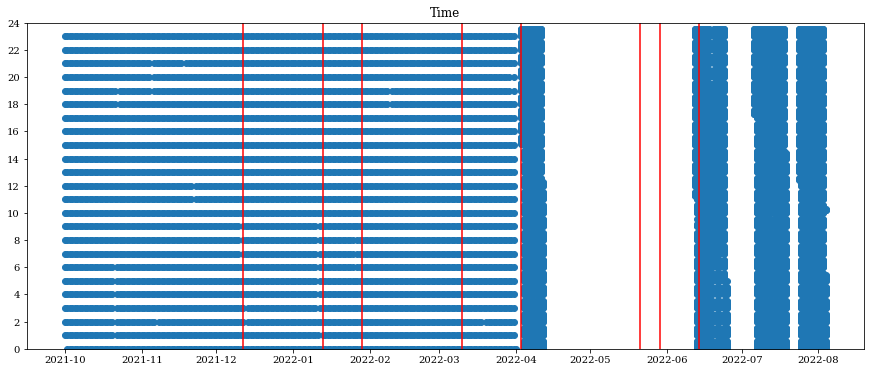

In [6]:
# datos_hora_imagen = df_estacion_vf[df_estacion_vf['Time']=='10:30']

variable = 'Time'

plt.figure(figsize=(15,6))
plt.title(variable)
# plt.axhline(y='11:00')
plt.ylim(top=24, bottom=0)
plt.yticks([i for i in range(0,25,2)])

for fecha in fechas_imgs:
    plt.axvline(x=pd.Timestamp(fecha), color='red')

plt.scatter(df_prueba.Date, df_prueba[variable]);

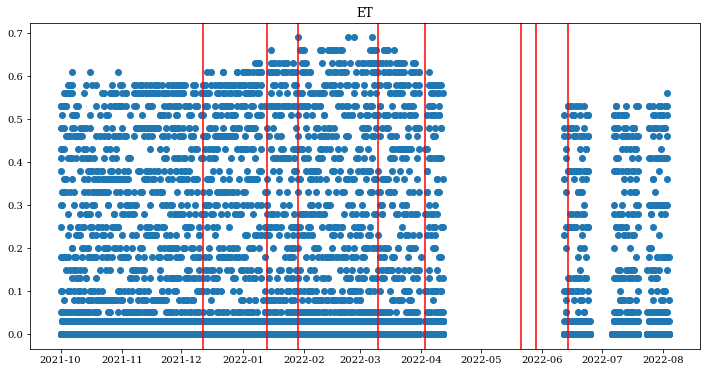

In [7]:
# datos_hora_imagen = df_estacion_vf[df_estacion_vf['Time']=='10:30']

variable = 'ET' # Wind Speed

plt.figure(figsize=(12,6))
# plt.scatter(datos_hora_imagen.Date, datos_hora_imagen['Wind Speed']);
plt.title(variable)
for fecha in fechas_imgs:
    plt.axvline(x=pd.Timestamp(fecha), color='red')
plt.scatter(df_estacion_vf.Date, df_estacion_vf[variable]);

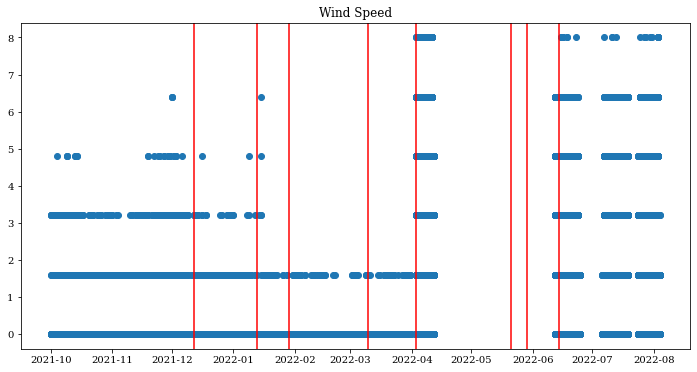

In [8]:
# datos_hora_imagen = df_estacion_vf[df_estacion_vf['Time']=='10:30']

variable = 'Wind Speed'
plt.figure(figsize=(12,6))
plt.title(variable)
for fecha in fechas_imgs:
    plt.axvline(x=pd.Timestamp(fecha), color='red')
plt.scatter(df_estacion_vf.Date, df_estacion_vf[variable]);

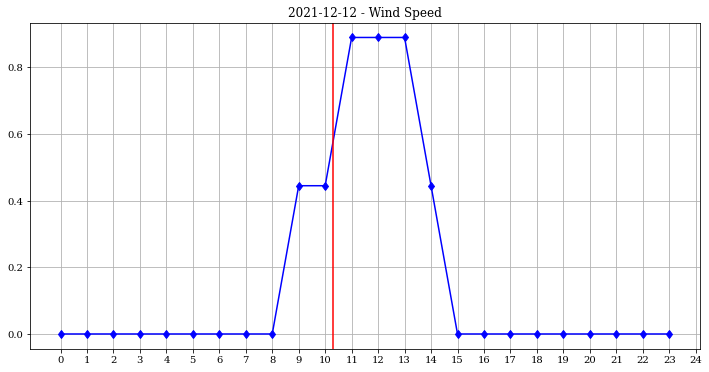

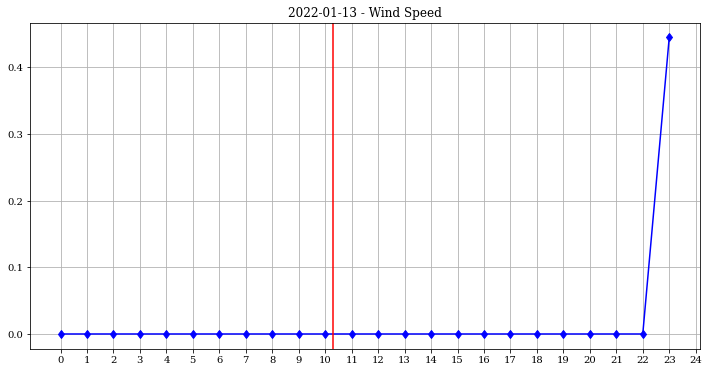

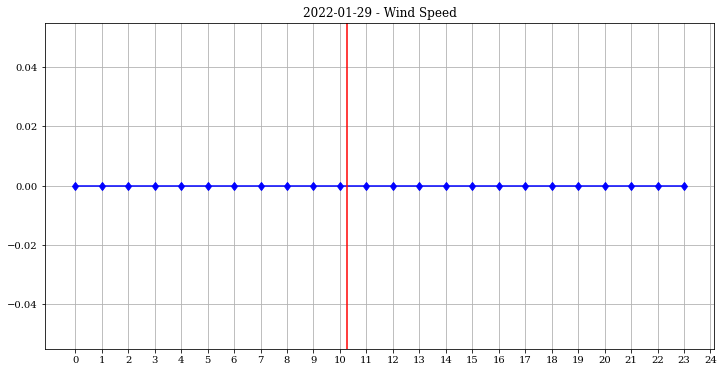

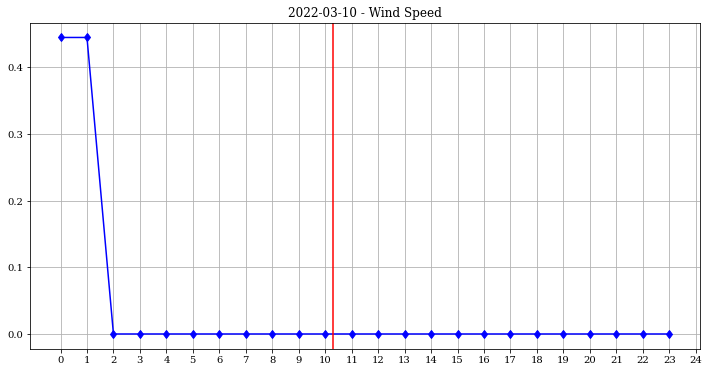

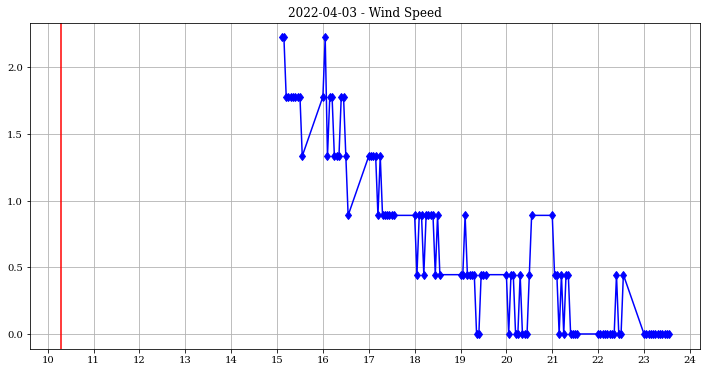

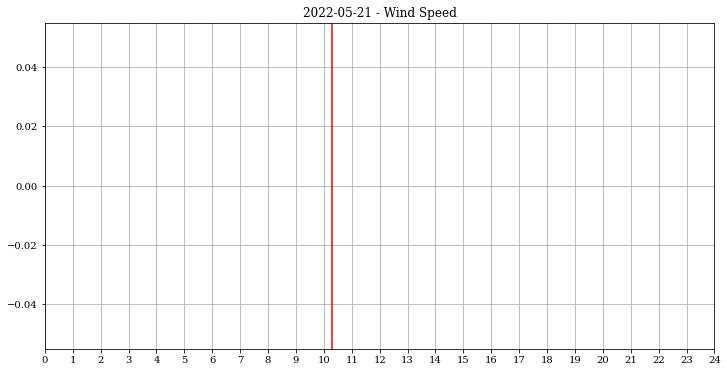

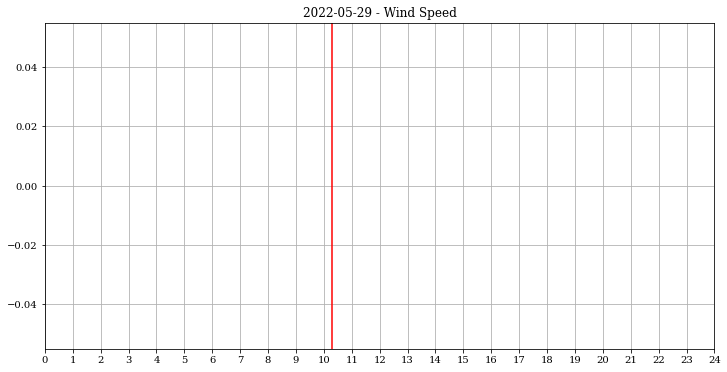

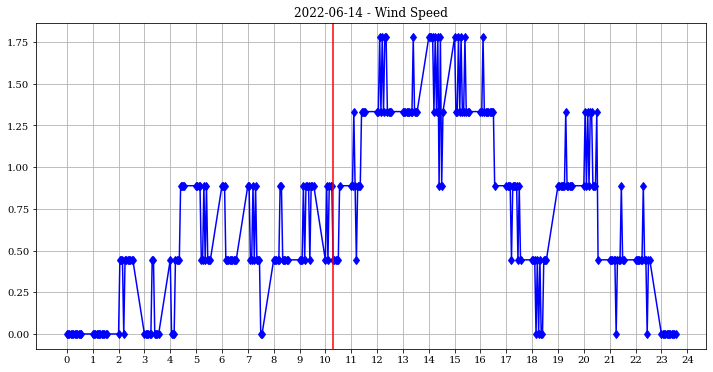

In [15]:
xticks_ = [i for i in range(0,25,1)]
variable = 'Wind Speed' 
# variable = 'ET'

for fecha in fechas_imgs:
    
    df_seleccion = df_prueba[df_prueba['Date']==fecha]
    
    # Visualización
    plt.figure(figsize=(12,6))
    plt.title(f'{fecha} - {variable}')
    plt.xticks(xticks_)
    plt.plot(df_seleccion.Time, df_seleccion[variable]*10/36, 'bd-')
    plt.axvline(x=10.28, color='red')
    plt.grid();

In [11]:
datos_hora_imagen

,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Hum,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
1709,2021-12-12,0.00,16.4,16.9,16.4,93.0,15.3,0.0,NaN,0.0,...,62,15.9,23.9,11.26,1.1665,0.00,1405,1,100.0,60
1710,2021-12-12,1.00,16.1,16.4,16.1,93.0,15.0,0.0,NaN,0.0,...,62,15.5,23.5,11.27,1.1690,0.00,1404,1,100.0,60
1711,2021-12-12,2.00,16.3,16.4,16.2,94.0,15.4,0.0,NaN,0.0,...,63,15.7,23.5,11.48,1.1700,0.00,1405,1,100.0,60
1712,2021-12-12,3.00,16.7,16.7,16.2,94.0,15.7,0.0,NaN,0.0,...,63,15.6,23.3,11.48,1.1720,0.00,1405,1,100.0,60
1713,2021-12-12,4.00,17.7,17.7,16.7,94.0,16.7,0.0,NaN,0.0,...,63,15.9,23.7,11.47,1.1707,0.05,1405,1,100.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7607,2022-06-14,23.35,15.7,15.8,15.6,84.0,13.0,0.0,NaN,0.0,...,52,13.9,24.4,9.53,1.1660,0.00,106,1,93.0,5
7608,2022-06-14,23.40,15.6,15.6,15.5,84.0,12.9,0.0,NaN,0.0,...,52,13.9,24.4,9.53,1.1660,0.00,106,1,93.0,5
7609,2022-06-14,23.45,15.4,15.5,15.4,84.0,12.8,0.0,NaN,0.0,...,52,13.9,24.4,9.53,1.1663,0.00,107,1,93.9,5
7610,2022-06-14,23.50,15.4,15.4,15.3,85.0,12.9,0.0,NaN,0.0,...,52,13.9,24.4,9.53,1.1663,0.00,106,1,93.0,5


In [12]:
display(datos_hora_imagen[datos_hora_imagen['Time']==10.30])
display(datos_hora_imagen[datos_hora_imagen['Time']==11.00])

,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Hum,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
7450,2022-06-14,10.3,22.9,22.9,22.8,62.0,15.2,1.6,W,0.13,...,54,14.6,24.6,9.83,1.1638,0.0,105,1,92.1,5


,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Hum,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
1720,2021-12-12,11.0,25.6,26.3,25.6,64.0,18.3,3.2,WSW,3.22,...,54,17.6,28.3,9.75,1.1473,0.51,1405,1,100.0,60
2478,2022-01-13,11.0,21.8,22.2,21.8,82.0,18.6,0.0,NaN,0.00,...,63,17.9,26.0,11.39,1.1600,0.03,1405,1,100.0,60
2859,2022-01-29,11.0,20.8,20.8,20.8,81.0,17.4,0.0,NaN,0.00,...,57,16.8,26.3,10.20,1.1582,0.03,1405,1,100.0,60
3817,2022-03-10,11.0,21.5,22.2,21.5,83.0,18.5,0.0,NaN,0.00,...,58,18.7,28.7,10.35,1.1460,0.03,1404,1,100.0,60
7456,2022-06-14,11.0,24.1,24.2,24.1,61.0,16.1,3.2,WNW,0.27,...,54,14.6,24.6,9.83,1.1631,0.46,106,1,93.0,5


El día `2022-04-03` se tienen datos pero a partir de la hora 15:10 pero se requiere datos de la hora 10.28

In [14]:
datos_hora_imagen[datos_hora_imagen['Date']=='2022-04-03']

,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Hum,In Dew,In Heat,In EMC,In Air Density,ET,Wind Samp,Wind Tx,ISS Recept,Arc. Int.
4332,2022-04-03,15.10,28.3,28.4,28.3,56.0,18.7,8.0,SW,0.67,...,49,18.8,32.2,8.85,1.1258,0.0,99,1,86.8,5
4333,2022-04-03,15.15,28.2,28.3,28.2,56.0,18.6,8.0,WSW,0.67,...,49,18.8,32.2,8.85,1.1256,0.0,99,1,86.8,5
4334,2022-04-03,15.20,28.1,28.2,28.1,56.0,18.5,6.4,SW,0.54,...,49,18.8,32.2,8.85,1.1256,0.0,99,1,86.8,5
4335,2022-04-03,15.25,28.1,28.1,28.1,58.0,19.0,6.4,SW,0.54,...,49,18.9,32.3,8.85,1.1253,0.0,98,1,86.0,5
4336,2022-04-03,15.30,28.1,28.2,28.1,57.0,18.8,6.4,SW,0.54,...,49,18.9,32.3,8.85,1.1253,0.0,94,1,82.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4433,2022-04-03,23.35,20.1,20.1,20.1,86.0,17.7,0.0,SW,0.00,...,51,19.1,31.8,9.22,1.1302,0.0,91,1,79.8,5
4434,2022-04-03,23.40,20.1,20.1,20.1,86.0,17.6,0.0,SW,0.00,...,51,19.0,31.7,9.22,1.1305,0.0,96,1,84.2,5
4435,2022-04-03,23.45,20.1,20.1,20.0,86.0,17.6,0.0,SW,0.00,...,51,19.0,31.7,9.22,1.1305,0.0,91,1,79.8,5
4436,2022-04-03,23.50,20.0,20.1,20.0,86.0,17.6,0.0,SW,0.00,...,51,19.0,31.7,9.22,1.1305,0.0,92,1,80.7,5
